In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

# Categorical 

A categorical variable can be unordered or ordered. The values of a categorical variable are the possible categories. These are usually labels of some kind but not always. The values can be integers as in a code of some kind or they can directly represent an ordering (first, second, third, etc). The values may also be dates. For now we concentrate on unordered categorical variables whose values are labels.

According to our taxonomy, we have three techniques available to us: descriptive statistics, table, and chart.

The descriptive statistics for a categorical variable are fairly limited. If we count up the number of observations for each label (category), we can determine which category has the least observations (minimum) and which category has the most observations (maximum). The other descriptive statistics don't really apply.

Let's assume we have a categorical variable, $X$, with five possible labels $\{a, b, c, d, e\}$. There are 191 observations.

In [3]:
x = ["a"] * 25 + ["b"] * 72 + ["c"] * 12 + ["d"] * 49 + ["e"] * 33
data = pd.DataFrame(x)
data.columns = ["X"]

Pandas `describe` will work well with a categorical variable although, as has already been mentioned, the actual representation may be a number (integer) so don't accidentally start taking means and variances...Pandas will let you do it.

In [4]:
data["X"].describe()

count     191
unique      5
top         b
freq       72
Name: X, dtype: object

We can get a better sense of the data by calculating the counts for each category:

In [5]:
data["X"].value_counts().sort_index()

a    25
b    72
c    12
d    49
e    33
Name: X, dtype: int64

For some reason, a Pandas Series doesn't display in as nice HTML. No matter, we can fix that by wrapping the Series in a DataFrame. I'll reveal the reason for the `sort_index` in a bit.

In [6]:
pd.DataFrame(data["X"].value_counts().sort_index())

,X
a,25
b,72
c,12
d,49
e,33


Scanning the table we can identify the most and least common categories: "b" with 72 observations and "c" with 12.

While in some situations we might be interested in these raw counts (usually when dollars are involved), it's often more interesting to look at the relative frequency or *proportions* for each category:

In [7]:
pd.DataFrame(data["X"].value_counts( normalize=True).sort_index())

,X
a,0.130890
b,0.376963
c,0.062827
d,0.256545
e,0.172775


If we take a moment, we can scan the table and determine that "b" is 37% of the observations and a good 12% *points* ahead of "d". "e" is almost half of "d", "e" and "a" are not far apart, and "c" is half of "a". While some of these relationships are visible in the absolute counts, as the counts grow larger this is not always the case.

We can also think of these values are estimates of a marginal probability distribution for X, $P(x)$. We can compare the observed distribution against an expected distribution, for example, a uniform distribution where each has an equal probability. For five possibilities, that would 20% for each one. "b" is almost twice that and "c" almost one fourth.

We can also reveal the reason for the `sort_index`: Pandas automatically sorts the counts (and relative counts):

In [8]:
pd.DataFrame(data["X"].value_counts( normalize=True))

,X
b,0.376963
d,0.256545
e,0.172775
a,0.130890
c,0.062827


It's even easier to see the relative sizes of the categories when the frequencies are sorted.

However, especially with large numbers of categories, you may want to show the data both ways. First, unsorted because you may want to be able to easily look up specific categories of interest. Second, sorted because you will want to be able to easily compare adjacent frequencies.

Moving to charts, we can create the classic bar chart:

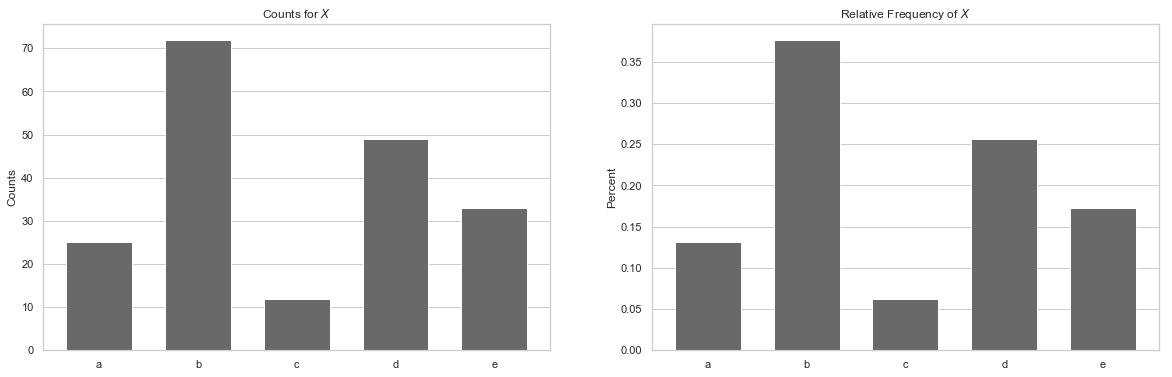

In [9]:
counts = data["X"].value_counts().sort_index()
proportions = data["X"].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.bar(x, counts, width, color="dimgray", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(counts.axes[0])
axes.set_title( "Counts for $X$")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)

axes = figure.add_subplot(1, 2, 2)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of $X$")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

Without looking at the y-axis scale, this charts look identical. This isn't surprising. The right is simply the normalized version of the left (every bar has been divided by the total count). This leaves the relative sizes of the bars unchanged but by expressing them in a easily interpreted scale (proportions), we get a slightly different feel for the data. So these are not *really* the same story.

One is a story of absolute magnitude and another is proportions. For relative charts, you often want to include the total number, $n$, somewhere in the chart or text to give the percentages context.

As before, we can sort the values. Here we'll show three charts: unsorted, sorted ascending, and sorted descending:

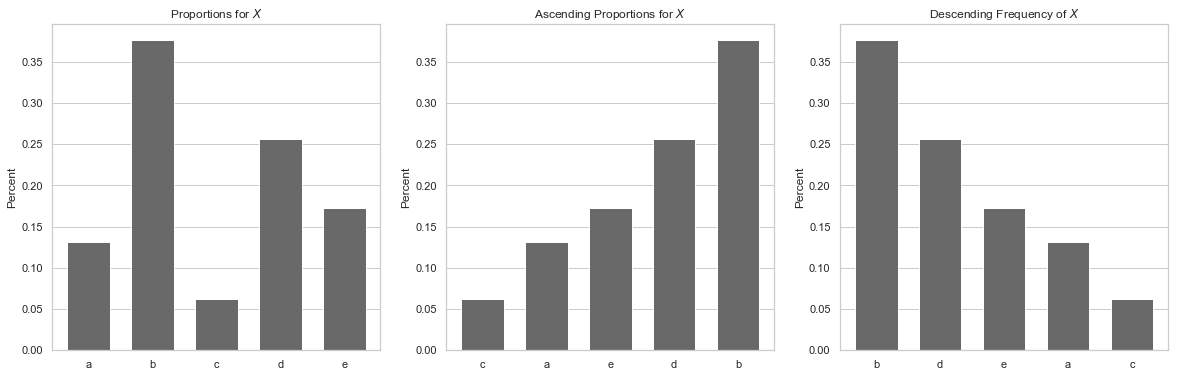

In [10]:
raw_proportions = data["X"].value_counts(normalize=True).sort_index()
proportions_up = raw_proportions.sort_values()
proportions_down = raw_proportions.sort_values(ascending=False)

x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.bar(x, raw_proportions, width, color="dimgray", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(raw_proportions.axes[0])
axes.set_title( "Proportions for $X$")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

axes = figure.add_subplot(1, 3, 2)
axes.bar(x, proportions_up, width, color="dimgray", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(proportions_up.axes[0])
axes.set_title( "Ascending Proportions for $X$")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)


axes = figure.add_subplot(1, 3, 3)
axes.bar(x, proportions_down, width, color="dimgray", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(proportions_down.axes[0])
axes.set_title( "Descending Frequency of $X$")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

It seems a little strange but the two sorted charts do tell slightly different stories because of the way our eyes follow the trend. One story is of categories getting more frequent and the other story is of categories getting less frequent.

In the Visualization chapter we discussed how a bar in a bar chart embodies extent (width and area) as well as length. At the extreme, this is why images can't (usually) be used as bars. If you lengthen them, to keep them recognizable, you also have to widen them. This means bars bring along a bit more information than we actually need to encode a *value*.

One alternative to bar charts is dot charts. One of the advantages of dot charts is that we can use them to emphasize differences. The placement of the dot only encodes position. Here's an example:

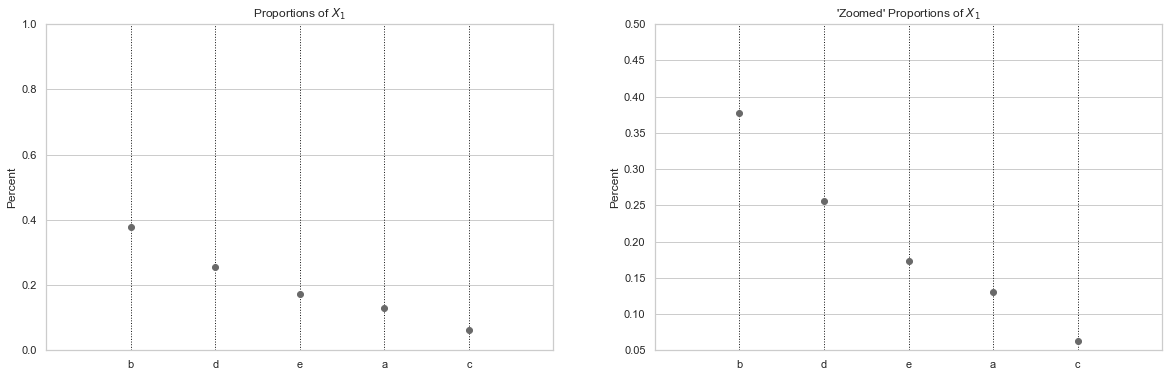

In [11]:
figure = plt.figure(figsize=(20, 6))

xs = [1, 2, 3, 4, 5]
axes = figure.add_subplot(1, 2, 1)
axes.plot(xs, proportions_down, "o", color="dimgray")
axes.vlines(xs, [0], [1], linestyles='dotted', lw=1)
axes.set_xticks(xs)
axes.set_xlim((0, 6))
axes.set_xticklabels(proportions_down.axes[0])
axes.set_title( "Proportions of $X_1$")
axes.set_ylabel( "Percent")
axes.set_ylim((0,1))
axes.xaxis.grid(False)

axes = figure.add_subplot(1, 2, 2)
axes.plot(xs, proportions_down, "o", color="dimgray")
axes.vlines(xs, [0], [1], linestyles='dotted', lw=1)
axes.set_xlim((0, 6))
axes.set_xticks(xs)
axes.set_xticklabels(proportions_down.axes[0])
axes.set_title( "'Zoomed' Proportions of $X_1$")
axes.set_ylabel( "Percent")
axes.set_ylim((0.05,0.5))
axes.xaxis.grid(False)

plt.show()
plt.close()

The variants above use a dotted line support for the dot that extends the entire range of the y-axis. This is to prevent us from creating bars that are 1 pixel wide. Note that these *are* variants. You may not need to do both charts; don't just copy/paste these "because". Be deliberate and don't go with defaults.

As a side note, this is one of those cases where it is often worth your while to learn how your graphics library works at a low level in case you need to make your own kind of chart, rather than always relying on the provided charts from the high level library.

At this point, where you go with this particular variable will depend on what you find and what your problem/question is. Often, at the start, you only need to plot the data, note the descriptive statistics, and make some basic observations. 

One question that continually arises is how much effort needs to be put into the individual charts given that this is exploration and not reporting. There are a number of ways to answer this.

1. EDA can be iterative.  You can quickly go through each variable, describe the variable and the extent of your domain knowledge, calculate descriptive statistics, and do a few main plots. Then go on to the next variable. When you are all done, come back. Start exploring more and indulge your curiosity. 
2. EDA can depend on maturity. If this is the 10th time you've looked at this data, you may only need to do something simple to make sure nothing substantive has changed (a new category?) *or* you can do something more complicated that you haven't done before.
3. EDA can depend on the goals. Is this a variable of particular interest? If you already know that this variable is important, you might want to spend a bit more time plotting it different ways. Is there already a question or problem associated with this variable? Don't move into *pairwise* comparisons prematurely, however. Be methodical.
4. EDA is not reporting. You can take this time to do a lot of different charts (perhaps you have your 3 favorites for a categorical variable and 4 for a numerical variable). You spit them out, look at them, and make relevant comments.

The last part brings up another question: how much effort should be put into formatting the chart? Aside from using a good base format, I think that the bare minimum for a chart is a title that says what it is (unlike a reporting title that may emphasize the message) and a y axis label. This should be enough for anyone who reads through your EDA to figure out what's going on. 

So let's assume that this variable is a bit more interesting to us. What could else could we do? We could plot a Uniform reference distribution or show deviations from it. And of course different presentations will tell different stories. During EDA we are trying to find stories as much as communicate them.

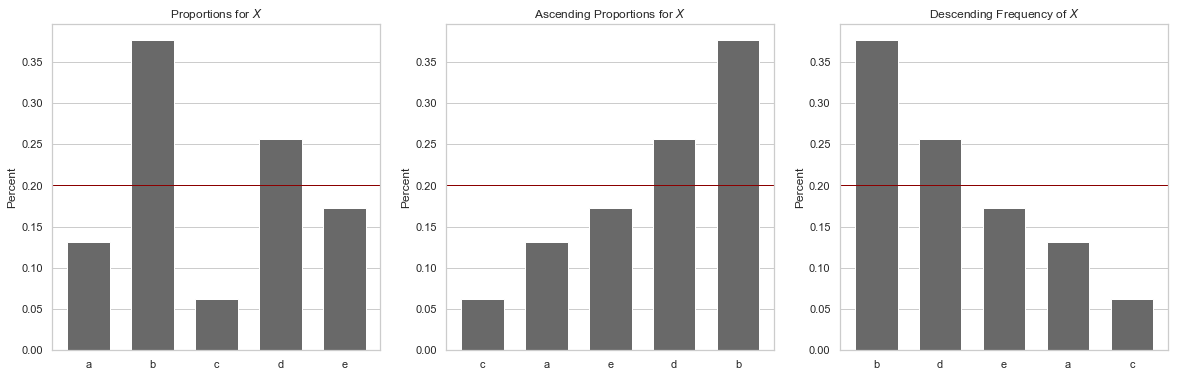

In [12]:
raw_proportions = data["X"].value_counts(normalize=True).sort_index()
proportions_up = raw_proportions.sort_values()
proportions_down = raw_proportions.sort_values(ascending=False)

x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.bar(x, raw_proportions, width, color="dimgray", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.axhline(0.2, 0, 4, lw=1, color="DarkRed")
axes.set_xticklabels(raw_proportions.axes[0])
axes.set_title( "Proportions for $X$")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

axes = figure.add_subplot(1, 3, 2)
axes.bar(x, proportions_up, width, color="dimgray", align="center")
axes.axhline(0.2, 0, 4, lw=1, color="DarkRed")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(proportions_up.axes[0])
axes.set_title( "Ascending Proportions for $X$")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

axes = figure.add_subplot(1, 3, 3)
axes.bar(x, proportions_down, width, color="dimgray", align="center")
axes.axhline(0.2, 0, 4, lw=1, color="DarkRed")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(proportions_down.axes[0])
axes.set_title( "Descending Frequency of $X$")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

Here we might note that "b" is substantially larger than expected and that "c" and "a" are much lower, perhaps even as a result.

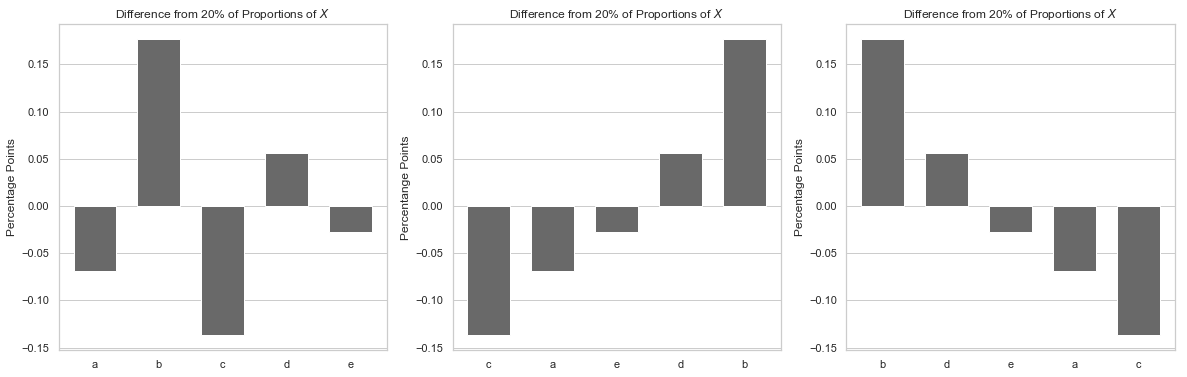

In [13]:
raw_proportions = data["X"].value_counts(normalize=True).sort_index()
proportions_up = raw_proportions.sort_values()
proportions_down = raw_proportions.sort_values(ascending=False)

x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.bar(x, raw_proportions - 0.2, width, color="dimgray", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(raw_proportions.axes[0])
axes.set_title( "Difference from 20% of Proportions of $X$")
axes.set_ylabel( "Percentage Points")
axes.xaxis.grid(False)

axes = figure.add_subplot(1, 3, 2)
axes.bar(x, proportions_up - 0.2, width, color="dimgray", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(proportions_up.axes[0])
axes.set_title( "Difference from 20% of Proportions of $X$")
axes.set_ylabel( "Percentange Points")
axes.xaxis.grid(False)

axes = figure.add_subplot(1, 3, 3)
axes.bar(x, proportions_down - 0.2, width, color="dimgray", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(proportions_down.axes[0])
axes.set_title( "Difference from 20% of Proportions of $X$")
axes.set_ylabel( "Percentage Points")
axes.xaxis.grid(False)

plt.show()
plt.close()

If we compare our original charts to these (and, again, you *may* not need all three of them), it's clear that we're looking at the data a different way and that we're discovering a different story. Whether or not this is a story we want to tell can be decided later. Make your notes and observations and move on. One important thing to note here is that the difference is percentage *points*, not percent: 37% is 60% larger than 20% (37/20 = 1.60) but the *difference* is only 17 percentage points.

At the EDA level, the goal is to *see* as much as possible. Then depending on what you *find*, when you move from exploration to reporting, you are going to use some subset of charts. Perhaps in this case, you want to use a bar chart to emphasize the raw counts and a dot chart for percentages to emphasize differences in percentages.